## 020318  
### RandomizedSearchCV vs. GridSearchCV  
http://scikit-learn.org/stable/auto_examples/model_selection/plot_randomized_search.html#sphx-glr-auto-examples-model-selection-plot-randomized-search-py


In [14]:
print(__doc__)

import numpy as np

from time import time
from scipy.stats import randint as sp_randint

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier

# get some data
digits = load_digits()
X, y = digits.data, digits.target

# build a classifier
clf = RandomForestClassifier(n_estimators=20)


# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


# specify parameters and distributions to sample from
param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run randomized search
n_iter_search = 20
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search)

start = time()
random_search.fit(X, y)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)

# use a full grid over all parameters
param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run grid search
grid_search = GridSearchCV(clf, param_grid=param_grid)
start = time()
grid_search.fit(X, y)

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.cv_results_['params'])))
report(grid_search.cv_results_)

Automatically created module for IPython interactive environment
RandomizedSearchCV took 5.61 seconds for 20 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.929 (std: 0.006)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}

Model with rank: 2
Mean validation score: 0.923 (std: 0.011)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 7, 'min_samples_leaf': 4, 'min_samples_split': 5}

Model with rank: 3
Mean validation score: 0.918 (std: 0.015)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 3, 'min_samples_leaf': 2, 'min_samples_split': 8}

GridSearchCV took 57.80 seconds for 216 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.935 (std: 0.012)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 10, 'min_samples_leaf': 1, 'min_sa

## 012818

### Resampling

In [6]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.combine import SMOTEENN 
X, y = make_classification(n_classes=2, class_sep=2,
weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0,
n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=10)
print('Original dataset shape {}'.format(Counter(y)))

sme = SMOTEENN(random_state=42)
X_res, y_res = sme.fit_sample(X, y)
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({1: 900, 0: 100})
Resampled dataset shape Counter({0: 900, 1: 881})


### Precision_Recall_Curve  
http://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#sphx-glr-auto-examples-model-selection-plot-precision-recall-py

Average precision-recall score: 0.88


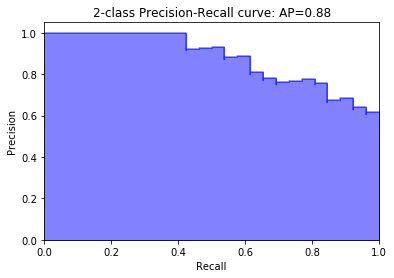

In [10]:
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
import numpy as np

iris = datasets.load_iris()
X = iris.data
y = iris.target

# Add noisy features
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# Limit to the two first classes, and split into training and test
X_train, X_test, y_train, y_test = train_test_split(X[y < 2], y[y < 2],
                                                    test_size=.5,
                                                    random_state=random_state)

# Create a simple classifier
classifier = svm.LinearSVC(random_state=random_state)
classifier.fit(X_train, y_train)
y_score = classifier.decision_function(X_test)### Precison_Recall_Curve

from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(y_test, y_score)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))
plt.show()

### Flatten the numpy array

In [5]:
import numpy as np
some_array = np.array([[1,2,3],[4,5,6]])
print(some_array)
## https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.flatten.html#numpy.ndarray.flatten
some_flattened_array = some_array.flatten('F')
print(some_flattened_array)
print(some_flattened_array.tolist())

[[1 2 3]
 [4 5 6]]
[1 4 2 5 3 6]
[1, 4, 2, 5, 3, 6]


## 012518 python class intro  
#### https://jeffknupp.com/blog/2014/06/18/improve-your-python-python-classes-and-object-oriented-programming/

Since instances are always referenced through self, static methods have no self parameter.

In [110]:
class Customer(object):
    """A customer of ABC bank with a checking account.
       Customers have the following properties:
       
       Attributes:
           name: A string represents the customer's name.
           balance: A float tracking the current balance of the account.
    """
    def __init__(self, name, balance=0.0):
        """Return a customer object whose name is *name* and 
        starting balance is *balance*."""
        self.name = name
        self.balance = balance
    
    def withdraw(self, amount):
        """Return the balance remaining after withdrawing *amount*"""
        if amount > self.balance:
            raise RuntimeError("Amount is greater than available balance.")
        self.balance -= amount
        return self.balance
    
    def deposit(self, amount):
        """Return the balacne remaining after depositing *amount*"""
        self.balance += amount
        return self.balance
    
    @staticmethod
    def say_hi():
        print("Hello...")

In [113]:
customer_a = Customer("Mike", 10000)
print(customer_a.withdraw(10))
print(customer_a.deposit(999))
Customer.say_hi()

print(Customer.__doc__)
print(Customer.withdraw.__doc__)

9990
10989
Hello...
A customer of ABC bank with a checking account.
       Customers have the following properties:
       
       Attributes:
           name: A string represents the customer's name.
           balance: A float tracking the current balance of the account.
    
Return the balance remaining after withdrawing *amount*


## 012518 python inheritance
The SchoolMember class in this situation is known as the base class or the superclass. The Teacher and Student classes are called the derived classes or subclasses.

**Note:** Since we are defining a __init__ method in Teacher and Student subclasses, Python does not automatically call the constructor of the base class SchoolMember, you have to explicitly call it yourself.

In contrast, if we have not defined an __init__ method in a subclass, Python will call the constructor of the base class automatically.

In [84]:
class SchoolMember:    
    """Represent any school member."""
    
    schoolmemCount = 0
    
    def __init__(self, name, age):
        self.name = name
        self.age = age
        print('(Initialize schoolmember: {})'.format(self.name))
        SchoolMember.schoolmemCount += 1
        
    def tell(self):
        """Tell me some details"""
        print("Name: {}, Age: {}.".format(self.name, self.age), end=" ==> ")
       
    def say_something(self):
        print("I like what I am doing.")
        
    def __str__(self):
        return "{} works here.".format(self.name)
        
    @classmethod
    def displayCount(cls):
        print ("Total school member: {:d}.".format(cls.schoolmemCount))
        
class Teacher(SchoolMember):
    """Represent a teacher."""
    def __init__(self, name, age, salary):
        SchoolMember.__init__(self, name, age)
        self.salary = salary
        print("Initialize teacher: {}".format(self.name))
        
    def tell(self):
        SchoolMember.tell(self)
        print("Salary: {:d}".format(self.salary))

class Student(SchoolMember):
    """Represent student."""
    def __init__(self, name, age, marks):
        SchoolMember.__init__(self, name, age)
        self.marks = marks
        print("Initialize a student: {}".format(self.name))
    def tell(self):
        SchoolMember.tell(self)
        print("Marks: {:d}".format(self.marks))
        
class Janitor(SchoolMember):
    """I don't use constructor here"""
    def tell(self):
        SchoolMember.tell(self)
        print("Cool guy.")
    def say_something(self):
        print("Life is short.")

t = Teacher('Mr. Einstein', 45, 60000)
s = Student('Nate', 4, 92)
j = Janitor('Tom', 50)

# print a blank line
print()

members = [s, t, j]

for member in members:
    ## work for both teachers and students
    print(str(member), '---')
    member.tell()
    member.say_something()
    
SchoolMember.displayCount()

(Initialize schoolmember: Mr. Einstein)
Initialize teacher: Mr. Einstein
(Initialize schoolmember: Nate)
Initialize a student: Nate
(Initialize schoolmember: Tom)

Nate works here. ---
Name: Nate, Age: 4. ==> Marks: 92
I like what I am doing.
Mr. Einstein works here. ---
Name: Mr. Einstein, Age: 45. ==> Salary: 60000
I like what I am doing.
Tom works here. ---
Name: Tom, Age: 50. ==> Cool guy.
Life is short.
Total school member: 3.


In [85]:
## built-in function to access attribute
## https://www.tutorialspoint.com/python/python_classes_objects.htm

print(hasattr(t,'salary'))
print(hasattr(t,'marks'))

print(getattr(t, 'salary'))

t.edu = 'Master' ## add an 'edu' attribute

print(getattr(t, 'edu'))

print("After couple years...")
setattr(t, 'edu', 'PhD')
print(getattr(t, 'edu'))


True
False
60000
Master
After couple years...
PhD


In [86]:
print(str(t))
print(repr(t))

Mr. Einstein works here.


In [74]:
print("SchoolMember.__doc__:", SchoolMember.__doc__)
print("SchoolMember.__name__:", SchoolMember.__name__)
print("SchoolMember.__module__:", SchoolMember.__module__)
print("SchoolMember.__dict__:", SchoolMember.__dict__)


SchoolMember.__doc__: Represent any school member.
SchoolMember.__name__: SchoolMember
SchoolMember.__module__: __main__
SchoolMember.__dict__: {'__module__': '__main__', '__doc__': 'Represent any school member.', 'schoolmemCount': 3, '__init__': <function SchoolMember.__init__ at 0x111f9cd08>, 'tell': <function SchoolMember.tell at 0x111f9c378>, 'say_something': <function SchoolMember.say_something at 0x111f9c6a8>, '__str__': <function SchoolMember.__str__ at 0x111f9ce18>, 'displayCount': <classmethod object at 0x11200b6a0>, '__dict__': <attribute '__dict__' of 'SchoolMember' objects>, '__weakref__': <attribute '__weakref__' of 'SchoolMember' objects>}


## 012418 python class  
#### https://python.swaroopch.com/oop.html


In [21]:
class Robot:
    """Represents a robot, with a name"""
    
    ## A class variable, counting the number of robots
    
    population = 0  ## population -> class variable
    
    def __init__(self, name):
        """Initalize a data"""
        self.name = name  ## name -> object variable
        print("Init: {}".format(self.name))
        
        ## when this person is created, the robot adds to the population
        Robot.population += 1
    
    def die(self):
        """I am dying"""
        print("{} is being destroyed".format(self.name))
        
        Robot.population -= 1
        
        if Robot.population == 0 :
            print("{} was the last one.".format(self.name))
        else:
            print("There is still {:d} robots.".format(Robot.population))
    
    def say_hi(self):
        print("Greeting from {}".format(self.name))
    
    @classmethod
    def how_many(cls):
        """print the current population"""
        print("We have {} robots.".format(cls.population))
        
rob1 = Robot("iComeInPease")
rob1.say_hi()
Robot.how_many()

rob2 = Robot("moveOnBack")
rob2.say_hi()
Robot.how_many()

print(Robot.__doc__)
print(Robot.say_hi.__doc__)
print(Robot.how_many.__doc__)

print("Destroy process starts.")

rob1.die()
rob2.die()

Robot.how_many()



Init: iComeInPease
Greeting from iComeInPease
We have 1 robots.
Init: moveOnBack
Greeting from moveOnBack
We have 2 robots.
Represents a robot, with a name
None
print the current population
Destroy process starts.
iComeInPease is being destroyed
There is still 1 robots.
moveOnBack is being destroyed
moveOnBack was the last one.
We have 0 robots.


In [8]:
class Person:
    
    def __init__(self, name):
        self.name = name
    
    
    def say_hi(self):
        print("Hello. My name is", self.name)
    ## pass ## an empty block

p = Person('Emily')
print(p)
p.say_hi()  ## or Person().say_hi()

Hello. My name is Emily


In [1]:
import pandas as pd

raw_data = {
    'id' : [6,7,8,9],
    'city' : ['New York', 'Tainan', 'Storrs', 'Atlantic City'],
    'rank' : ['39', '1', '20', '15'],
    'population' : ['3M', '720K', '10K', '50K']
}

df_city_info = pd.DataFrame(raw_data, 
                            index = pd.Index(['A', 'B', 'C', 'D'], name='letter'),
                            columns = pd.Index(['id', 'city', 'rank', 'population'], name='attributes'))

df_city_info

attributes,id,city,rank,population
letter,,,,
A,6,New York,39,3M
B,7,Tainan,1,720K
C,8,Storrs,20,10K
D,9,Atlantic City,15,50K


In [2]:
df_city_info_stack = df_city_info.stack(0)

In [3]:
df_city_info_stack.unstack()

attributes,id,city,rank,population
letter,,,,
A,6,New York,39,3M
B,7,Tainan,1,720K
C,8,Storrs,20,10K
D,9,Atlantic City,15,50K


In [4]:
df_city_info_stack.unstack(0)

letter,A,B,C,D
attributes,,,,
id,6,7,8,9
city,New York,Tainan,Storrs,Atlantic City
rank,39,1,20,15
population,3M,720K,10K,50K


In [5]:
df_city_info_stack.unstack(1)

attributes,id,city,rank,population
letter,,,,
A,6,New York,39,3M
B,7,Tainan,1,720K
C,8,Storrs,20,10K
D,9,Atlantic City,15,50K


## Map ##
http://www.bogotobogo.com/python/python_fncs_map_filter_reduce.php

In [6]:
list(map((lambda x: x **2), [1, 2, 3]))

[1, 4, 9]

In [7]:
list(map(pow, [2,3,4], [10, 11, 12]))

[1024, 177147, 16777216]

## Filter ##

In [8]:
list( filter((lambda x: x < 0), range(-5,5)))

[-5, -4, -3, -2, -1]

In [9]:
a = [1,2,3,5,7,9]
b = [2,3,5,6,7,8]
print (list(filter(lambda x: x in a, b)))  # prints out [2, 3, 5, 7]

[2, 3, 5, 7]


## Reduce ##

In [10]:
import functools
L = ['Testing ', 'shows ', 'the ', 'presence', ', ','not ', 'the ', 'absence ', 'of ', 'bugs']
functools.reduce( (lambda x,y:x+y), L)

'Testing shows the presence, not the absence of bugs'

In [11]:
''.join(L)

'Testing shows the presence, not the absence of bugs'

In [12]:
import functools, operator
functools.reduce(operator.add, L)

'Testing shows the presence, not the absence of bugs'

## Assign dataframe ##

In [13]:
import numpy as np
import pandas as pd
dff = pd.DataFrame(np.random.randn(10,3), columns=list('ABC'))
dff.iloc[3:5,0] = np.nan
dff.iloc[4:6,1] = np.nan
dff.iloc[5:8,2] = np.nan

dff

,A,B,C
0,-0.280553,-0.952247,-0.445539
1,0.506626,0.607370,-0.183443
2,2.043525,-0.790702,1.451456
3,NaN,0.615766,-1.193391
4,NaN,NaN,-1.162201
5,-1.194305,NaN,NaN
6,0.183962,0.102477,NaN
7,-1.441511,0.357323,NaN
8,0.354610,0.840561,0.670454
9,0.871472,0.747167,0.795437


In [14]:
dff.A.isnull().any()

True

In [15]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
A    8 non-null float64
B    8 non-null float64
C    7 non-null float64
dtypes: float64(3)
memory usage: 320.0 bytes


## Merge example ##

In [16]:
import pandas as pd
left = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                       'A': ['A0', 'A1', 'A2', 'A3'],
                       'B': ['B0', 'B1', 'B2', 'B3']})

left_more = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3', 'K4', 'K0'],
                       'A': ['A0', 'A1', 'A2', 'A3', 'A4', 'A0'],
                       'B': ['B0', 'B1', 'B2', 'B3', 'B4', 'B0']})


right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],  
                      'C': ['C0', 'C1', 'C2', 'C3'],
                      'D': ['D0', 'D1', 'D2', 'D3']})
 

In [17]:
print(left)

    A   B key
0  A0  B0  K0
1  A1  B1  K1
2  A2  B2  K2
3  A3  B3  K3


In [18]:
print (left_more)

    A   B key
0  A0  B0  K0
1  A1  B1  K1
2  A2  B2  K2
3  A3  B3  K3
4  A4  B4  K4
5  A0  B0  K0


In [19]:
left[left['key'] == 'K1']

,A,B,key
1,A1,B1,K1


In [20]:
left_and_more_inner = pd.merge(left[['A', 'key']], left_more[['A', 'key']], how='inner', on='A')
print(left_and_more_inner)

    A key_x key_y
0  A0    K0    K0
1  A0    K0    K0
2  A1    K1    K1
3  A2    K2    K2
4  A3    K3    K3


In [ ]:
    
## DataFrame.duplicated(subset=None, keep='first')[source]

left_more_dup_in_A = left_more.duplicated()

print(left_more_dup_in_A.value_counts())

print(left_more.duplicated())
print(left_more['A'].duplicated())
print(left_more_dup_in_A.values)

print(left_more[left_more_dup_in_A.values])
print(type(left_more_dup_in_A))

print(left)
print(" ")
print(left_more)
print(" ")
print(right)

mix_on = pd.merge(left_more[['A', 'key']], right[['C', 'key']], on='key')

print(mix_on)

mix_left = pd.merge(left_more[['A', 'key']], right[['C', 'key']], how='left', on='key')

print(mix_left)

left_and_more_left = pd.merge(left[['A', 'key']], left_more[['A', 'key']], how='left', on='A')
print(left_and_more_left)


left_and_more_inner = pd.merge(left[['A', 'key']], left_more[['A', 'key']], how='inner', on='A')
print(left_and_more_inner)


left_and_more_right = pd.merge(left[['A', 'key']], left_more[['A', 'key']], how='right', on='A')
print(left_and_more_right)

| code | label |
| :--: |:--|
|1|Fatal|
|2|Serious|
|3|Slight|

In [ ]:
print(__doc__)

from time import time

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter

from sklearn import manifold, datasets

# Next line to silence pyflakes. This import is needed.
Axes3D

n_points = 1000
X, color = datasets.samples_generator.make_s_curve(n_points, random_state=0)
n_neighbors = 10
n_components = 2

In [ ]:
print(X.shape)
print(color.shape)

In [ ]:
fig = plt.figure(figsize=(15, 8))
plt.suptitle("Manifold Learning with {} points and {} neighbors."\
             .format(n_points, n_neighbors), fontsize=14)

ax = fig.add_subplot(251, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.view_init(4, -72)

In [ ]:
methods = ['standard', 'ltsa', 'hessian', 'modified']
labels = ['LLE', 'LTSA', 'Hessian LLE', 'Modified LLE']
plt.clf()
for i, method in enumerate(methods):
    t0 = time()
    Y = manifold.LocallyLinearEmbedding(n_neighbors, n_components, \
                                       eigen_solver='auto',\
                                       method=method).fit_transform(X)
    t1 = time()
    print("{:s}: {:.2g} sec".format(methods[i], t1 - t0))
    
    ax = fig.add_subplot(252 + i)
    plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
    plt.title("{:s} ({:.2g} sec)".format(labels[i], t1- t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    plt.axis('tight')

t0 = time()
Y = manifold.Isomap(n_neighbors, n_components).fit_transform(X)
t1 = time()
print("Isomap: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(257)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("Isomap (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')
    
t0 = time()
Y = manifold.MDS(n_components, max_iter=100, n_init=1).fit_transform(X)
t1 = time()
print("MDS: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(258)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("MDS (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

t0 = time()
Y = manifold.SpectralEmbedding(n_components=n_components,
                                n_neighbors=n_neighbors).fit_transform(X)
t1 = time()
print("SpectralEmbedding: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(259)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("SpectralEmbedding (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

t0 = time()
Y = manifold.TSNE(n_components=n_components, init='pca', random_state=0).fit_transform(X)
t1 = time()
print("t-SNE: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(2, 5, 10)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("t-SNE (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

    
plt.show()
plt.gcf().clear()

### Remove the N/A data entry ###

In [ ]:
## http://scikit-learn.org/stable/auto_examples/manifold/plot_compare_methods.html#sphx-glr-auto-examples-manifold-plot-compare-methods-py
print(__doc__)

from time import time
import pandas as pd
import numpy as np
from IPython.display import display


from sklearn.datasets import load_iris

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets

iris_data = load_iris()

iris_x = iris_data.data
iris_y = iris_data.target

#print(iris_x)
# df1 = pd.DataFrame({'A': [np.nan, '9', '23', '15'],
#                     'B': ['22', '-4', '0', '-4'],
#                     'C': ['90', '33', 0, '0'],
#                     'D': ['994', np.nan, '5', '432']},
#                     index=[0, 1, 2, 3])
# print("Watch out the difference between integer and string")
# print(df1) 

In [ ]:
print(iris_x[:3])

In [ ]:
print(dir(iris_data))
print(iris_data.feature_names)
print(iris_data.target_names)


In [ ]:
df1 = pd.DataFrame(iris_x, columns=iris_data.feature_names)
display(df1.head(3))

In [ ]:
## Clean the data
counter_nan = df1.isnull().sum()
print(counter_nan)

In [ ]:
counter_without_nan = counter_nan[counter_nan==0]
## remove the columns with missing elements
df1_all = df1[counter_without_nan.keys()]

In [ ]:
## remove the column by its indexes
# df1_all = df1_all.iloc[:,:2]

In [ ]:
from sklearn.preprocessing import StandardScaler
x = df1_all.iloc[:, :].values
standard_scalar = StandardScaler()
x_std = standard_scalar.fit_transform(x)

In [ ]:
print(x_std)
print(x_std.shape)

### T distributed stochastic neighbor embedding (t-SNE) visualization ###

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state = 311)
x_test_2d = tsne.fit_transform(x_std)

In [ ]:
print(x_test_2d.shape)
print(x_test_2d[:5])

In [ ]:
print(np.unique(x_test_2d).shape)
print(np.unique(x_test_2d)[:5])

In [ ]:
aa = np.array([1, 2, 3, 4, 3])
print(aa)
print(np.unique(aa))

In [ ]:
# scatter plot the sample points among 5 classes
markers = {'s', 'd', 'o', '^', 'v'}
color_map = {0: 'red', 1: 'blue', 2: 'lightgreen', 3: 'purple', 4: 'cyan'}
plt.figure()
for idx, cl in enumerate(np.unique(x_test_2d)):
    #print(idx, cl)
    print(x_test_2d[idx][0])
    #plt.scatter(x=x_test_2d[idx][0], y=x_test_2d[idx][1])
#     plt.scatter(x=x_test_2d[idx][0], y=x_test_2d[idx][1], c=color_map[idx],
#                 marker=markers[idx], label=cl) 
#plt.show()

### Interactive matplotlib ###

In [ ]:
# import matplotlib.pyplot as plt
# %matplotlib notebook
# plt.plot([0, 1, 2, 2])
# plt.show()

In [ ]:
## It doens't work on JupyterLab yet. 10/24/17
# import ipympl
# import matplotlib.pyplot as plt

# plt.plot([0, 1, 2, 2])
# plt.show()

In [ ]:
import pandas as pd
import numpy as np
from IPython.display import display

df1 = pd.DataFrame({'A': ['0', '9', '23', '15'],
                    'B': ['22', '-4', '0', '-4'],
                    'C': ['90', '33', 0, '0'],
                    'D': ['994', '-2', '5', '432']},
                    index=[0, 1, 2, 3])
print("Watch out the difference between integer and string")
print(df1) 

In [ ]:
df1.C.loc[df1['C'] == 0] = np.nan
print(df1)

In [ ]:
func = lambda x: df1.loc[df1[x] == '-4']
len(func('B'))
#len(df1.loc[df1['B'] == '-4'])

In [ ]:
## http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
dfd = pd.DataFrame({'A': [1, 2, 3],
                    'B': [4, 5, 6]},
                    index=list('abc'))
display(dfd)

In [ ]:
print(dfd.loc[dfd.index[[0, 2]], 'A'])

In [ ]:
dfcat = pd.DataFrame({ 'A' : pd.Series(list('aabbcdba')).astype('category'),
                       'B' : np.random.randn(8) })
print(dfcat.dtypes)
display(dfcat)


In [ ]:
cstore = pd.HDFStore('df_cats.h5', mode='w')
cstore.append('dfcat', dfcat)
## cstore.append('dfcat', dfcat, format='table', data_columns=['A'])
##hello = cstore.select('dfcat')
cstore.close()
## result = cstore.select('dfcat', where="A in ['b','c']")

### Slicing the dataframe  
#### https://stackoverflow.com/questions/10665889/how-to-take-column-slices-of-dataframe-in-pandas

In [ ]:
import pandas as pd    
import numpy as np
df = pd.DataFrame(np.random.rand(4,7), columns = list('abcdefg'))
display(df)

In [ ]:
df.loc[:, ["a", "b", "c"]] ## label based selective column slicing

In [ ]:
df.loc[:, "a":"c"] ## label based column ranges slicing

In [ ]:
df.iloc[:, 0:3] ## index based column ranges slicing 

In [ ]:
### with 2 different column ranges, index based slicing: 
df[df.columns[0:1].tolist() + df.columns[2:3].tolist()]

In [ ]:
df.columns[0:1].tolist() + df.columns[2:3].tolist()

### Table ###

| This | is   |
|------|------|
|   a  | table|


| Date | Name | Website |
|:-----:	|:------:	|:-----------:	|
|A|B|C |

### Classification comparison ###  
https://machinelearningmastery.com/compare-machine-learning-algorithms-python-scikit-learn/

In [ ]:
# Compare Algorithms
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pandas.read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
import matplotlib
#matplotlib.use("TkAgg")

import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
ax = plt.axes(projection=ccrs.Mollweide())
ax.stock_img()
plt.show()

In [ ]:
from geopy.geocoders import Nominatim
geolocator = Nominatim()
location = geolocator.geocode("Taiwan")
#print(location.address)
print((location.latitude, location.longitude))
print(location.raw)